# what i done?  :)
1. I created graphs to visualize the relationship between Codeforces ratings and the difference from CodeChef ratings.
2. Based on the plots, I observed that the difference decreases as Codeforces rating increases.
3. Then, I built a regression model to predict this difference using the Codeforces rating.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url='https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.shape

(11275, 5)

In [50]:
df = df.dropna()

In [51]:
df.isnull().sum()

ss_username    0
cf_username    0
cf_rating      0
cc_username    0
cc_rating      0
dtype: int64

In [52]:
df.shape

(6442, 5)

In [53]:
data = df.copy()
data

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
5,aurinegro,aurinegro,2202.0,aurinegro,2628.0
6,retrograd,retrograd,2262.0,retrograd,2628.0
7,chris19,anudeep2011,2023.0,anudeep2011,2565.0
...,...,...,...,...,...
10269,Prince_Raj,daud43,624.0,praj0609,580.0
10270,Notanonymous,bhardwajarpit1998,1182.0,arpit_987,569.0
10272,yash1399,yash1399,979.0,yash1399,518.0
10274,hihihihipathak,praveenpathak,1581.0,hihihihipathak,460.0


In [54]:
flt_data = data[['cf_rating','cc_rating']]
flt_data[flt_data['cf_rating']>flt_data['cc_rating']].shape[0] # counting no of rows in which cf_rating > cc_Rating 

641

created a margin difference between cf_rating and cc_rating

In [55]:
flt_data.loc[flt_data['cf_rating'] > flt_data['cc_rating'], 'diff_margin'] = (flt_data['cc_rating'] - flt_data['cf_rating']).abs()
flt_data

C:\Users\nikhi\AppData\Local\Temp\ipykernel_24784\2677010383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_data.loc[flt_data['cf_rating'] > flt_data['cc_rating'], 'diff_margin'] = (flt_data['cc_rating'] - flt_data['cf_rating']).abs()


,cf_rating,cc_rating,diff_margin
0,3449.0,3007.0,442.0
4,1703.0,2673.0,NaN
5,2202.0,2628.0,NaN
6,2262.0,2628.0,NaN
7,2023.0,2565.0,NaN
...,...,...,...
10269,624.0,580.0,44.0
10270,1182.0,569.0,613.0
10272,979.0,518.0,461.0
10274,1581.0,460.0,1121.0


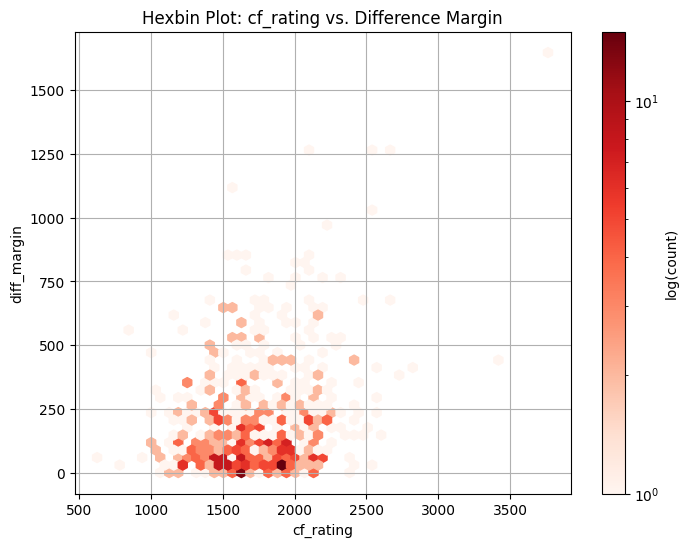

In [56]:
# plot b/w cf_rating and diff_margin
plt.figure(figsize=(8,6))
hb = plt.hexbin(flt_data['cf_rating'], flt_data['diff_margin'], gridsize=50, cmap='Reds', bins='log')
plt.colorbar(hb, label='log(count)')
plt.xlabel('cf_rating')
plt.ylabel('diff_margin')
plt.title("Hexbin Plot: cf_rating vs. Difference Margin")
plt.grid(True)
plt.show()


WHAT WE CAN INTERPRET FROM THE ABOVE? 

1. Most users have similar ratings on CodeChef and Codeforces (small difference) and fall in the beginner to intermediate range on Codeforces.
   Most users are concentrated between: 900 to 1600 rating.

2. As cf_rating increases, diff_margin tends to decrease. This means the users with high cf_rating have same rating as well as cc_rating. but for the beginners they focus on one of the platform!

3. Users with (dif_margin > 1000) are may be inconsistent or are new to this.



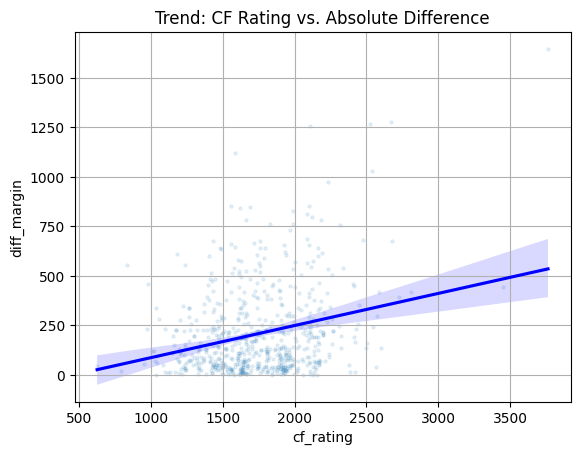

In [57]:
# Decline trend b/w cf_rating and differnce_margin
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='cf_rating', y='diff_margin', data=flt_data, scatter_kws={'s': 5, 'alpha': 0.1}, line_kws={'color': 'blue'})

plt.title('Trend: CF Rating vs. Absolute Difference')
plt.xlabel('cf_rating')
plt.ylabel('diff_margin')
plt.grid(True)
plt.show()


Polynomial MAE: 120.35840915016249
Polynomial R² Score: 0.4103105421178437


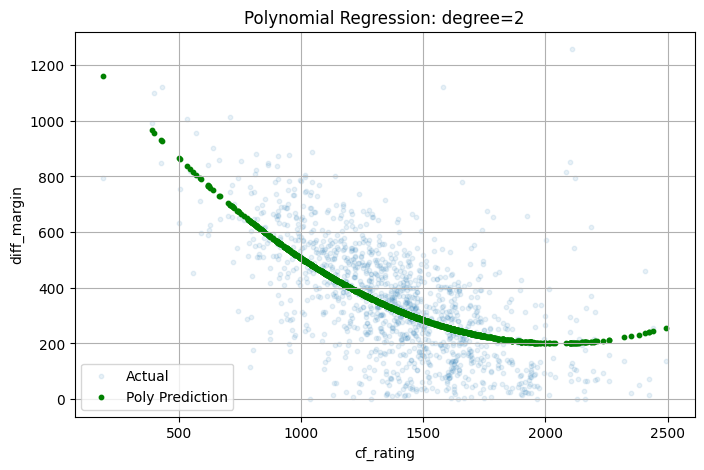

In [58]:
# making a predictive model with polynomial of degree 2   
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_poly_pred = poly_model.predict(X_test)

print("Polynomial MAE:", mean_absolute_error(y_test, y_poly_pred))
print("Polynomial R² Score:", r2_score(y_test, y_poly_pred))

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, alpha=0.1, s=10, label="Actual")
plt.scatter(X_test, y_poly_pred, color='green', s=10, label="Poly Prediction")
plt.xlabel("cf_rating")
plt.ylabel("diff_margin")
plt.title("Polynomial Regression: degree=2")
plt.legend()
plt.grid(True)
plt.show()
